# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Set the units to metric, so they're easier to interpret
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olonkinbyen
Processing Record 2 of Set 1 | whitehorse
Processing Record 3 of Set 1 | ilha de mocambique
Processing Record 4 of Set 1 | andergrove
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | tefe
Processing Record 7 of Set 1 | glace bay
Processing Record 8 of Set 1 | dudinka
Processing Record 9 of Set 1 | de queen
Processing Record 10 of Set 1 | afaahiti
Processing Record 11 of Set 1 | hamilton
Processing Record 12 of Set 1 | luderitz
Processing Record 13 of Set 1 | brokopondo
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | kavaratti
Processing Record 16 of Set 1 | enewetak
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | vila franca do campo
Processing Record 20 of Set 1 | richards bay
Processing Record 21 of Set 1 | invercargill
Processing Record 22 of Set 1 | crook

Processing Record 42 of Set 4 | conception bay south
Processing Record 43 of Set 4 | olhao
Processing Record 44 of Set 4 | arteche
Processing Record 45 of Set 4 | tchintabaraden
Processing Record 46 of Set 4 | zahedan
Processing Record 47 of Set 4 | sao benedito do rio preto
Processing Record 48 of Set 4 | colonia
Processing Record 49 of Set 4 | parabel'
Processing Record 0 of Set 5 | sampit
Processing Record 1 of Set 5 | lubang
Processing Record 2 of Set 5 | asau village
City not found. Skipping...
Processing Record 3 of Set 5 | camana
Processing Record 4 of Set 5 | coquimbo
Processing Record 5 of Set 5 | hazard
Processing Record 6 of Set 5 | byron bay
Processing Record 7 of Set 5 | tralee
Processing Record 8 of Set 5 | khanpur mahar
Processing Record 9 of Set 5 | kayyerkan
Processing Record 10 of Set 5 | baskale
Processing Record 11 of Set 5 | ancud
Processing Record 12 of Set 5 | kailua-kona
Processing Record 13 of Set 5 | urangan
Processing Record 14 of Set 5 | nova sintra
Processi

Processing Record 30 of Set 8 | harstad
Processing Record 31 of Set 8 | arzgir
Processing Record 32 of Set 8 | umm ruwaba
Processing Record 33 of Set 8 | medina de pomar
Processing Record 34 of Set 8 | chubbuck
Processing Record 35 of Set 8 | oqtosh
Processing Record 36 of Set 8 | cochin
Processing Record 37 of Set 8 | krasnoarmeysk
Processing Record 38 of Set 8 | al mijlad
Processing Record 39 of Set 8 | skerries
Processing Record 40 of Set 8 | muromtsevo
Processing Record 41 of Set 8 | mount pearl
Processing Record 42 of Set 8 | vredenburg
City not found. Skipping...
Processing Record 43 of Set 8 | kerikeri
Processing Record 44 of Set 8 | opuwo
Processing Record 45 of Set 8 | island harbour
Processing Record 46 of Set 8 | caconda
Processing Record 47 of Set 8 | nova olimpia
Processing Record 48 of Set 8 | sitka
Processing Record 49 of Set 8 | itamaraca
Processing Record 0 of Set 9 | freetown
Processing Record 1 of Set 9 | yagry
City not found. Skipping...
Processing Record 2 of Set 9

Processing Record 21 of Set 12 | strugi-krasnyye
Processing Record 22 of Set 12 | yigo village
Processing Record 23 of Set 12 | cotoca
Processing Record 24 of Set 12 | bikenibeu village
Processing Record 25 of Set 12 | waingapu
Processing Record 26 of Set 12 | kruisfontein
Processing Record 27 of Set 12 | severo-yeniseyskiy
Processing Record 28 of Set 12 | san jose village
City not found. Skipping...
Processing Record 29 of Set 12 | mariehamn
Processing Record 30 of Set 12 | owen sound
Processing Record 31 of Set 12 | port pirie
Processing Record 32 of Set 12 | bamboo flat
Processing Record 33 of Set 12 | argo
Processing Record 34 of Set 12 | mulifanua
City not found. Skipping...
Processing Record 35 of Set 12 | mila
Processing Record 36 of Set 12 | formosa do rio preto
Processing Record 37 of Set 12 | lamu
Processing Record 38 of Set 12 | ghat
Processing Record 39 of Set 12 | mascara
Processing Record 40 of Set 12 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 41 of Set 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,-3.99,89,100,11.86,SJ,1707881122
1,whitehorse,60.7161,-135.0538,-5.57,79,75,6.69,CA,1707881194
2,ilha de mocambique,-15.0342,40.7358,25.21,88,100,4.90,MZ,1707881242
3,andergrove,-21.0833,149.1833,28.69,78,54,4.25,AU,1707881242
4,arraial do cabo,-22.9661,-42.0278,25.32,87,100,5.61,BR,1707881220


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

OSError: Cannot save file into a non-existent directory: 'output_data'

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/cities.csv'

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig1.png'

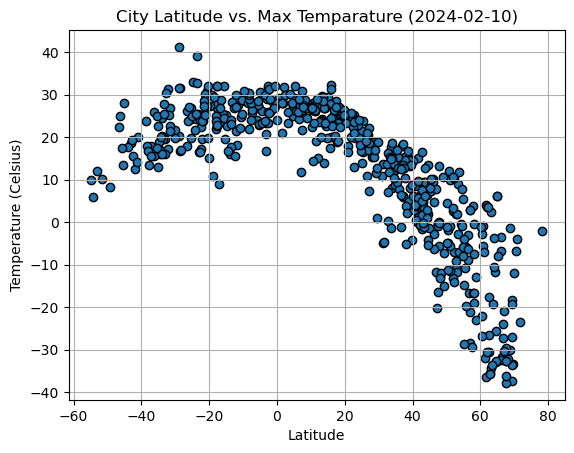

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temparature (2024-02-10)")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig2.png'

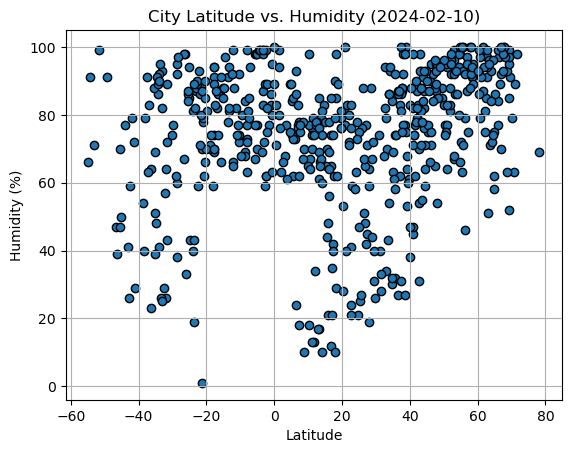

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-02-10)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig3.png'

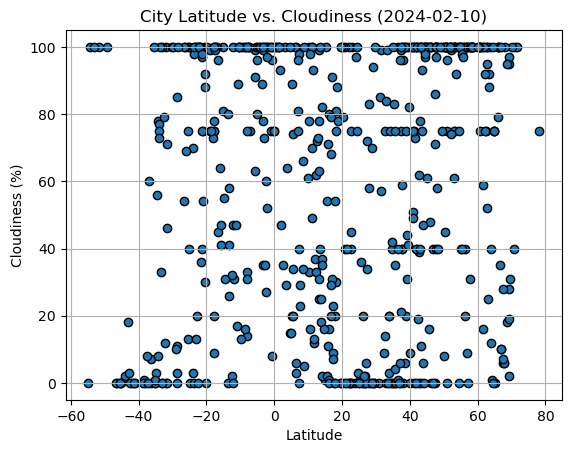

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-02-10)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig4.png'

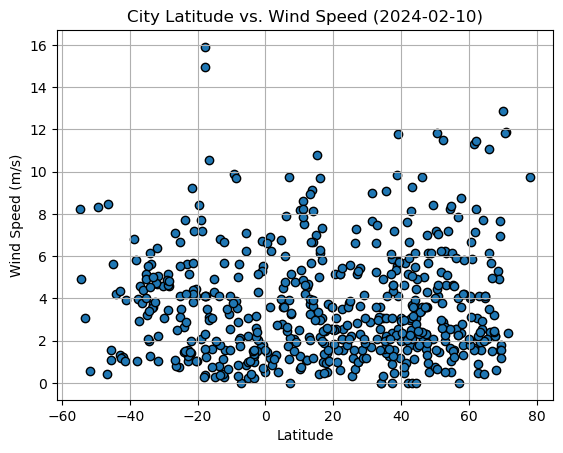

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-02-10)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

NameError: name 'x_values' is not defined

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,-3.99,89,100,11.86,SJ,1707881122
1,whitehorse,60.7161,-135.0538,-5.57,79,75,6.69,CA,1707881194
6,glace bay,46.1969,-59.9570,-2.73,95,100,9.77,CA,1707881242
7,dudinka,69.4058,86.1778,-37.40,99,28,1.79,RU,1707881195
8,de queen,34.0379,-94.3413,8.07,93,0,0.00,US,1707881242


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,ilha de mocambique,-15.0342,40.7358,25.21,88,100,4.90,MZ,1707881242
3,andergrove,-21.0833,149.1833,28.69,78,54,4.25,AU,1707881242
4,arraial do cabo,-22.9661,-42.0278,25.32,87,100,5.61,BR,1707881220
5,tefe,-3.3542,-64.7114,23.60,99,100,1.00,BR,1707881242
9,afaahiti,-17.7500,-149.2833,26.93,69,100,14.97,PF,1707881192


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8755767043719583


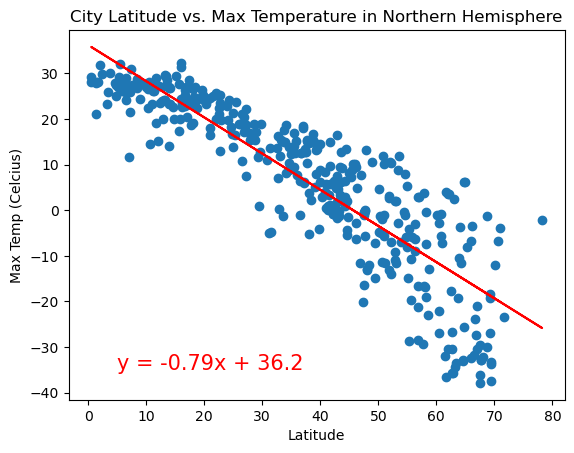

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Establish a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (5,-35), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (Celcius)")
plt.title("City Latitude vs. Max Temperature in Northern Hemisphere")
plt.show()

The r-value is: 0.5118961053872233


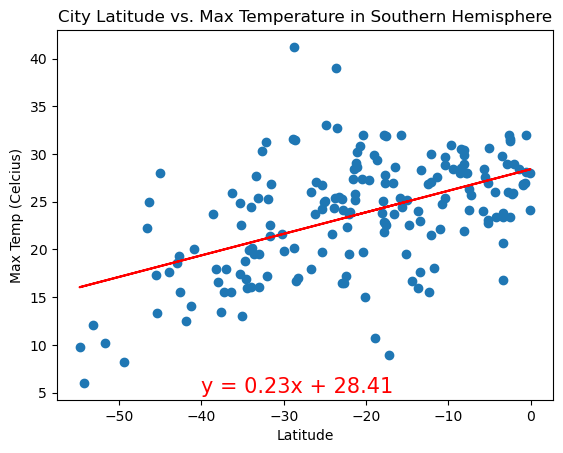

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Establish a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (-40,5), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (Celcius)")
plt.title("City Latitude vs. Max Temperature in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:**

Using the r-values here we can see that there is a strong negative correlation between a city's latitude and it's temperature for cities in the Northern Hempisphere and moderate positive correlation for cities in the Southern Hemisphere. This means that the data indicates that for the Northern Hemisphere the temperature should decrease as the latitude increases and that the opposite can be expected for the Southern Hemisphere. It seems that a more concise conclusion would be that the closer a city is to the equator you can expect a higher tempature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4162505924733009


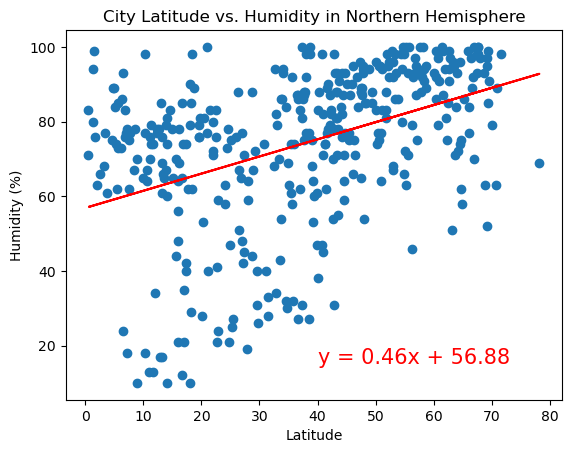

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Establish a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (40,15), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity in Northern Hemisphere")
plt.show()

The r-value is: 0.3523370965928646


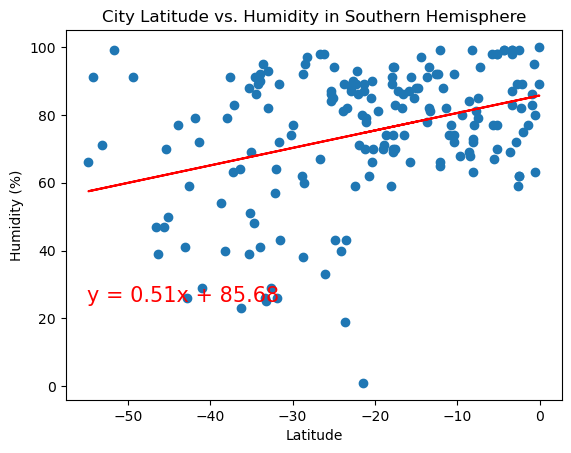

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Establish a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (-55,25), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** 

Judginge by the r-values we can see that there is a moderate/strong positive correlation between a city's latitude and it's humidity in the Northern Hemisphere but that correlation is less strong for cities in the Southern Hemisphere. So you may expect higher humidity the higher in latitude you go for cities in the Nothern Hemisphere but less so with cities in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2039482141393499


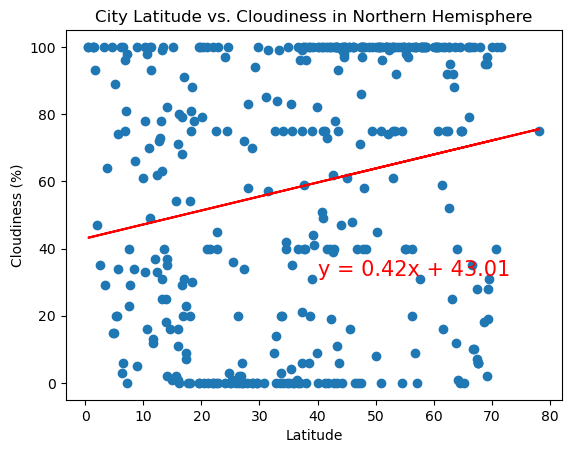

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Establish a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (40,32), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness in Northern Hemisphere")
plt.show()

The r-value is: 0.3925560499396787


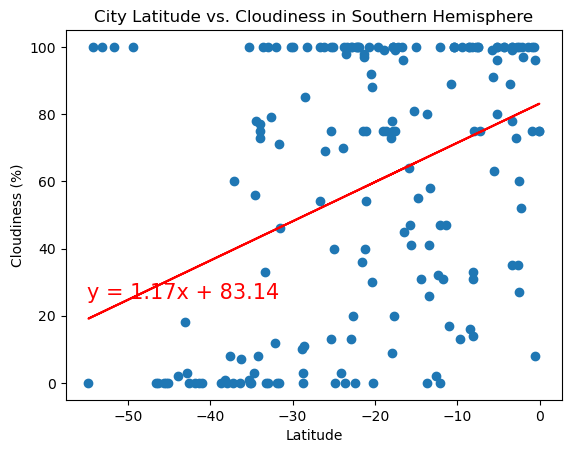

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Establish a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (-55,25), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** 

These two graphs show a positive correlation between latitude and cloudiness but it is moderate/weak at best. Cloudiness does increase slightly as we move up in latitude but the data is widely dispersed.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06974663714592316


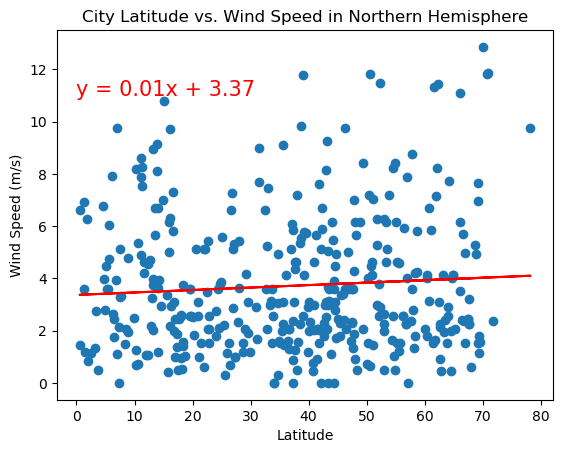

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Establish a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (0,11), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed in Northern Hemisphere")
plt.show()

The r-value is: -0.16372283391109949


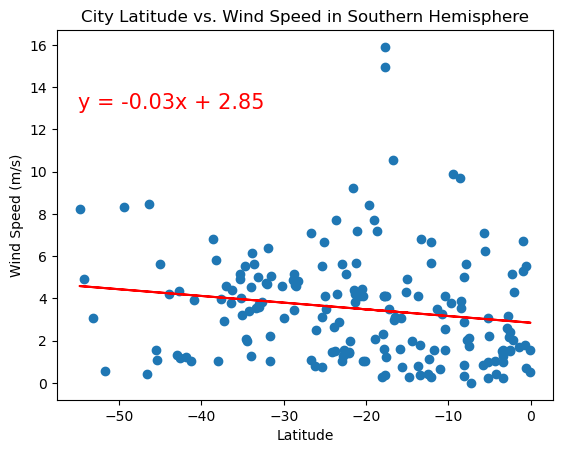

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Establish a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (-55,13), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:**

Based on the r-value being close to zero we can see that the relationship between the city's latitude and it's wind speed is weak at best. This is true for cities in both the Northern and Southern Hemispheres. This woudl show that a city's latitude is not useful data in determining that city's wind speed.